In [ ]:
!pip install simple_image_download==0.4
from simple_image_download import simple_image_download as simp

In [ ]:
response = simp.simple_image_download
keywords = ["traffic car","car"]

In [ ]:
for kw in keywords:
    response().download(kw , 50)

In [ ]:
# instalation de labelImg pour annoter les images
!pip install labelImg

In [1]:
# pour lancer le programme d'annotation des images
!labelImg

Cancel creation.


In [5]:
# !pip install ultralytics

In [2]:
from ultralytics import YOLO

In [5]:
model = YOLO('yolov8m.pt')  # load a pretrained model (recommended for training)

In [6]:
model.train(data='./data_custom.yaml', epochs=1, imgsz=640)

New https://pypi.org/project/ultralytics/8.0.116 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.114  Python-3.9.12 torch-2.0.1+cpu CPU
yolo\engine\trainer: task=detect, mode=train, model=yolov8m.pt, data=./data_custom.yaml, epochs=1, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, for

In [3]:
model = YOLO("runs/detect/train/weights/best.pt")

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as img

img1 = img.imread("./Data/test/1.jpg")

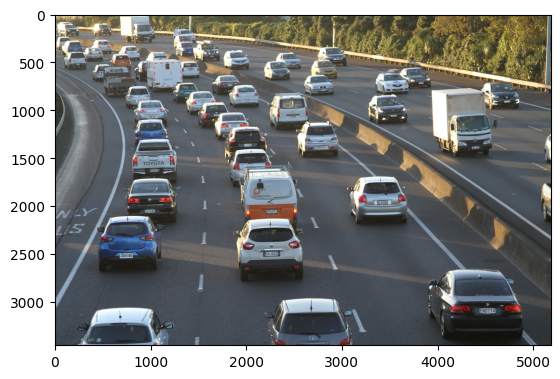

In [5]:
plt.imshow(img1)
plt.show()

In [6]:
results = model(inputs , conf=0.6 ,save=True ,save_conf=True) 


0: 448x640 44 cars, 1: 448x640 44 cars, 4256.5ms
Speed: 20.4ms preprocess, 2128.3ms inference, 17.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict2


In [18]:
results[0].boxes.boxes[0] # x1,y1,x2,y2,confiance,class

WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


tensor([3.8791e+03, 2.6615e+03, 4.8930e+03, 3.3980e+03, 9.9999e-01, 0.0000e+00])

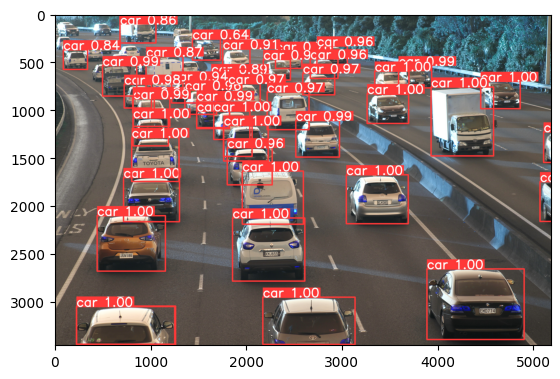

In [8]:
img1_result = img.imread("./runs/detect/predict2/image0.jpg")
plt.imshow(img1_result)
plt.show()

In [11]:
for result in results:
    boxes = result.bxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    probs = result.probs  # Class probabilities for classification outputs

In [10]:
import cv2

def RGB(event, x, y, flags, param):
    if event == cv2.EVENT_MOUSEMOVE :
        colorsBGR = [x,y]
        print(colorsBGR)
        
cv2.namedWindow('RGB')
cv2.setMouseCallback('RGB',RGB)       

In [13]:

yL1 = 490
L1 = {'p1':(100, yL1), 'p2':(800, yL1)}

yL2 = 250
L2 = {'p1':(300, yL2), 'p2':(600, yL2)}


In [14]:
yL1 = 490
L1_p1 = (100, yL1)
L1_p2 = (800, yL1)

# Open the camera
cap = cv2.VideoCapture('./Data/test/3.mp4')

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        frame = cv2.resize(frame,(1000,650))
        results = model(frame ,conf=0.5 ,save=True ,save_conf=True)
        #annotated_frame = results[0].plot()
        
        for box in results[0].boxes.boxes :
            x1,y1,x2,y2 =int(box[0]),int(box[1]),int(box[2]),int(box[3])
            cbox = ( (int(x1+x2)//2) , (int(y1+y2)//2) )
            if cbox[1] > L2['p2'][1] :
                cv2.rectangle(frame,(x1,y1),(x2,y2),(0,0,255),1)
        
        cv2.line(frame,L1['p1'],L1['p2'],(0,255,255),2)
        cv2.line(frame,L2['p1'],L2['p2'],(0,255,255),2)
        cv2.imshow("RGB",frame)

        
        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        break

cap.release()
cv2.destroyAllWindows()


0: 416x640 11 cars, 874.9ms
Speed: 6.0ms preprocess, 874.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict4
WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.

0: 416x640 11 cars, 911.1ms
Speed: 5.0ms preprocess, 911.1ms inference, 15.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict4
WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.

0: 416x640 11 cars, 1006.5ms
Speed: 7.0ms preprocess, 1006.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict4
WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.

0: 416x640 11 cars, 934.2ms
Speed: 7.0ms preprocess, 934.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict4
WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.

0: 416x640 11 cars, 921.3ms
Speed: 6.0ms preprocess, 921.3ms inference, 0.0ms po

Results saved to runs\detect\predict4
WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.

0: 416x640 10 cars, 931.1ms
Speed: 7.0ms preprocess, 931.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict4
WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.

0: 416x640 11 cars, 841.0ms
Speed: 6.0ms preprocess, 841.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict4
WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.

0: 416x640 12 cars, 871.3ms
Speed: 5.0ms preprocess, 871.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict4
WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.

0: 416x640 12 cars, 906.4ms
Speed: 6.0ms preprocess, 906.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict4
WARNING  'Boxes.boxes' is deprecated. Use 'Box

Speed: 14.0ms preprocess, 952.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict4
WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.

0: 416x640 10 cars, 989.2ms
Speed: 4.0ms preprocess, 989.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict4
WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.

0: 416x640 11 cars, 908.1ms
Speed: 6.0ms preprocess, 908.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict4
WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.

0: 416x640 11 cars, 939.8ms
Speed: 6.0ms preprocess, 939.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict4
WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.

0: 416x640 8 cars, 827.4ms
Speed: 6.0ms preprocess, 827.4ms inference, 0.0ms postprocess per image at shape (1,

WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.

0: 416x640 12 cars, 900.5ms
Speed: 5.0ms preprocess, 900.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict4
WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.

0: 416x640 12 cars, 939.9ms
Speed: 6.0ms preprocess, 939.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict4
WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.

0: 416x640 12 cars, 1008.8ms
Speed: 4.0ms preprocess, 1008.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict4
WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.

0: 416x640 14 cars, 933.7ms
Speed: 6.0ms preprocess, 933.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict4
WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.

0: 416x640 10 car

Results saved to runs\detect\predict4
WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.

0: 416x640 15 cars, 914.4ms
Speed: 5.0ms preprocess, 914.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict4
WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.

0: 416x640 15 cars, 886.8ms
Speed: 5.0ms preprocess, 886.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict4
WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.

0: 416x640 15 cars, 891.2ms
Speed: 6.0ms preprocess, 891.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict4
WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.

0: 416x640 15 cars, 950.3ms
Speed: 5.0ms preprocess, 950.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict4
WARNING  'Boxes.boxes' is deprecated. Use 'Box

Speed: 7.0ms preprocess, 939.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict4
WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.

0: 416x640 12 cars, 917.8ms
Speed: 4.0ms preprocess, 917.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict4
WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.

0: 416x640 14 cars, 1038.4ms
Speed: 3.0ms preprocess, 1038.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict4
WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.

0: 416x640 14 cars, 937.8ms
Speed: 5.0ms preprocess, 937.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict4
WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.

0: 416x640 13 cars, 923.1ms
Speed: 6.0ms preprocess, 923.1ms inference, 0.0ms postprocess per image at shape (

WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.

0: 416x640 15 cars, 959.0ms
Speed: 17.0ms preprocess, 959.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict4
WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.

0: 416x640 16 cars, 850.6ms
Speed: 4.0ms preprocess, 850.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict4
WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.

0: 416x640 14 cars, 919.1ms
Speed: 5.0ms preprocess, 919.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict4
WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.

0: 416x640 13 cars, 946.4ms
Speed: 4.0ms preprocess, 946.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict4
WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.

0: 416x640 12 cars

Results saved to runs\detect\predict4
WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.

0: 416x640 10 cars, 936.3ms
Speed: 6.0ms preprocess, 936.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict4
WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.

0: 416x640 11 cars, 903.8ms
Speed: 6.0ms preprocess, 903.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict4
WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.

0: 416x640 14 cars, 950.7ms
Speed: 4.0ms preprocess, 950.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict4
WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.

0: 416x640 15 cars, 974.6ms
Speed: 5.0ms preprocess, 974.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict4
WARNING  'Boxes.boxes' is deprecated. Use 'Box

Speed: 6.0ms preprocess, 860.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict4
WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.

0: 416x640 11 cars, 834.0ms
Speed: 6.0ms preprocess, 834.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict4
WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.

0: 416x640 12 cars, 919.1ms
Speed: 5.0ms preprocess, 919.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict4
WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.

0: 416x640 12 cars, 915.5ms
Speed: 6.0ms preprocess, 915.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict4
WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.

0: 416x640 10 cars, 934.1ms
Speed: 4.0ms preprocess, 934.1ms inference, 0.0ms postprocess per image at shape (1,

In [1]:
# in cmd
# !yolo task=detect mode=train data=data_custom.yaml epochs=1 model=yolov8m.pt imgsz=640 batch=8

In [2]:
# in cmd
# !yolo task=detect mode=predict model=yolo_custom.pt show=True conf=0.3 source=test/1.jpg